<a href="https://colab.research.google.com/github/mianshariq/Mini_Projects/blob/master/911EmergencyCalls_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Case Study

Congrats! You have been contracted to conduct a brief analysis of a dataset containing ememrgency calls in order to determine the allocation of funds to you local authorities.  This analysis will play a role in deciding changes to the emergency response department.

The data is based in 911 emergency calls and your job is to determine a variety of issues regarding said calls.

1. Using Pandas and Numpy, analyse the data and come up with 5 questions that you would like to answer about the data.

2. The instructor will provide a range of questions to answer, and you should use your knowledge to complete them as a team.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Data/911.csv')

In [ ]:
data.info()

In [ ]:
data.tail()

In [ ]:
data.describe()

# Self-Created Questions

1. What are the 10 most common titles for 911 emergency calls?
1. How many emergency calls did each zip code make?
1. What township(s) made the least 911 emergency calls?
1. How many addresses have "dead end" in them?
1. How many 911 emergency calls were made in each year?

## Question 1

What are the 10 most common titles for 911 emergency calls?

In [ ]:
titles = data['title'].value_counts()[:10].to_dict()

print('The 10 most common jobs are:')

for key,value in titles.items():
  print(key + ':', value)

The 10 most common jobs are:
Traffic: VEHICLE ACCIDENT -: 23062
Traffic: DISABLED VEHICLE -: 7696
Fire: FIRE ALARM: 5496
EMS: RESPIRATORY EMERGENCY: 5112
EMS: CARDIAC EMERGENCY: 5011
EMS: FALL VICTIM: 4863
EMS: VEHICLE ACCIDENT: 3935
Traffic: ROAD OBSTRUCTION -: 3143
EMS: SUBJECT IN PAIN: 2687
EMS: HEAD INJURY: 2631


In [ ]:
data['title'].value_counts().head(10)

Traffic: VEHICLE ACCIDENT -    23062
Traffic: DISABLED VEHICLE -     7696
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5011
EMS: FALL VICTIM                4863
EMS: VEHICLE ACCIDENT           3935
Traffic: ROAD OBSTRUCTION -     3143
EMS: SUBJECT IN PAIN            2687
EMS: HEAD INJURY                2631
Name: title, dtype: int64

In [31]:
zip_code_calls = data['zip'].value_counts()
zip_code_calls=zip_code_calls.head(50)
zip_code_calls

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
19002.0    3050
19468.0    2990
19454.0    2781
19090.0    2635
19038.0    2578
19046.0    2564
19426.0    2461
19428.0    2296
19006.0    2256
19462.0    2078
19040.0    2043
19438.0    1990
19422.0    1963
19027.0    1818
19044.0    1595
19001.0    1514
19010.0    1316
18964.0    1287
19004.0    1280
19440.0    1190
19096.0    1115
19003.0    1094
19095.0    1023
19473.0    1012
19444.0    1008
19525.0     965
19034.0     796
18073.0     736
19072.0     728
18969.0     672
19012.0     593
19031.0     566
19025.0     493
19035.0     481
19465.0     458
19066.0     451
19041.0     436
18074.0     435
19405.0     428
19460.0     427
18041.0     414
19087.0     344
18054.0     326
18076.0     306
19085.0     304
Name: zip, dtype: int64

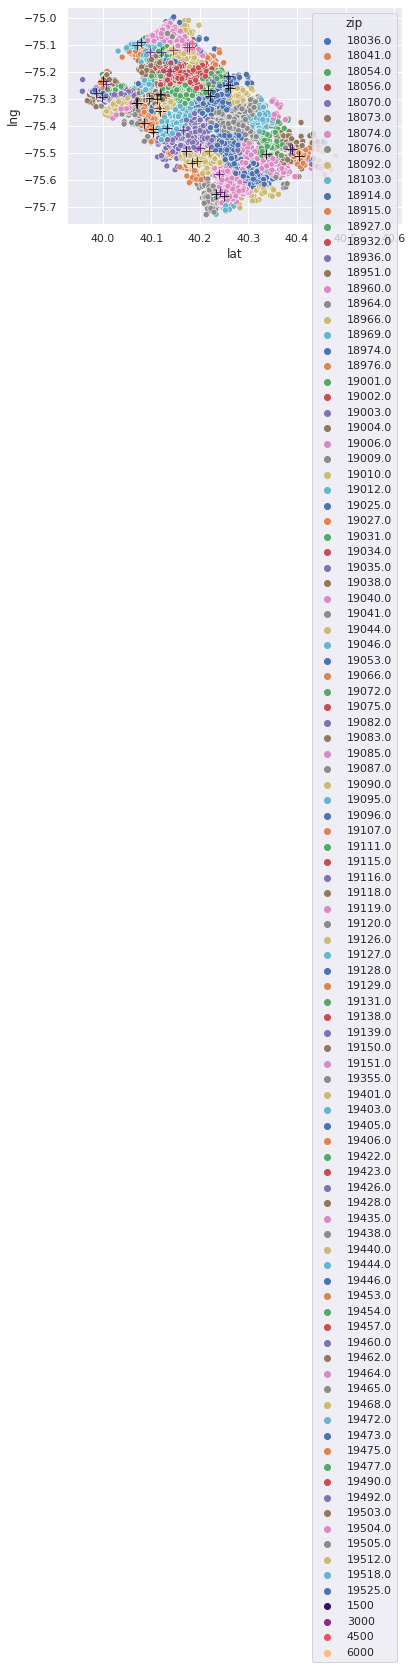

In [ ]:
data=data[data['lat']>38.58]
data=data[data['lng']>-75.8]
sns.scatterplot(x=data['lat'], y=data['lng'], hue=data['zip'],data=data, palette="deep")
sns.scatterplot(x=data['lat'], y=data['lng'], hue=zip_code_calls,data=data, s=100, color=".2", marker="+", palette="magma")

# The below chart is a overlapped scatter plot. We plotted the coordinates which creates
# a map of alll the calls based on longatude and latitude.
# We overlapped a second plot on top of the first one and added the top zip code with most
# callls coordinates for th

## Question 2

How many emergency calls did each zip code make?

In [ ]:
# df['zip'].dropna().unique() would remove the NaN zip codes if using the unique method

# Since each row is an instance of an emergency call, we merely need to count the number
# of occurrences of each zip code.
zip_code_calls = data['zip'].value_counts().to_dict()

for key,value in zip_code_calls.items():
  print('Zip code', int(key), 'made', value, 'emergency calls between Dec. 2015 and Aug. 2016.')

## Question 3

What township(s) made the least 911 emergency calls?

In [30]:
data['twp'].value_counts().tail(1)
zip_code_calls = data['zip'].value_counts()
zip_code_calls=zip_code_calls.head(10)
print(zip_code_calls

sns.countplot(data['zip'].value_counts() , palette="magma")

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
19002.0    3050
19468.0    2990
19454.0    2781
19090.0    2635
19038.0    2578
Name: zip, dtype: int64


ValueError: ignored

## Question 4

How many addresses have "dead end" in them?

In [ ]:
dead_ends = data[data['addr'].str.contains('DEAD END', na=False)]['addr'].count()
print('There are', dead_ends, 'addresses with "DEAD END" in them.')

There are 1390 addresses with "DEAD END" in them.


## Question 5

How many 911 emergency calls were made in each year?

In [ ]:
calls_2015 = data[data['timeStamp'].str.contains('2015', na=False)]['timeStamp'].count()
calls_2016 = data[data['timeStamp'].str.contains('2016', na=False)]['timeStamp'].count()

print('There were', calls_2015, 'emergency calls made in 2015.')
print('There were', calls_2016, 'emergency calls made in 2016.')

# Checking that the number matches with the count given by the describe() method
print(calls_2015 + calls_2016, 'were made in total.')

There were 7968 emergency calls made in 2015.
There were 91509 emergency calls made in 2016.
99477 were made in total.


# Instructor's Questions

In [ ]:
'''
data['timeStamp']=pd.to_datetime(data['timeStamp'])
data.info()
'''

"\ndata['timeStamp']=pd.to_datetime(data['timeStamp'])\ndata.info()\n"

In [ ]:
'''
data['timeStamp']=data['timeStamp'].dt.time 
'''

"\ndata['timeStamp']=data['timeStamp'].dt.time \n"

In [ ]:
data[['Hour']] = pd.cut(hours, 
                    bins=[0,4,8,12,16,20,24], 
                    include_lowest=True, 
                    labels=['0-4AM','4AM-8AM','8AM-12PM', '12PM-4PM', '4PM-8PM', '8PM-12AM'])

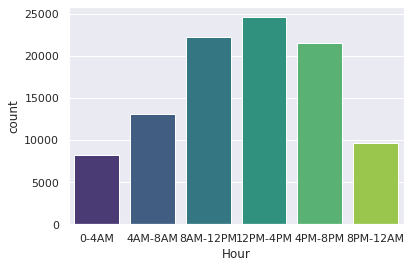

In [ ]:
data['Hour'].value_counts()
df7=data['Hour']
sns.countplot(x="Hour", data=data,palette='viridis')

In [ ]:
data['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [ ]:
data['title'].nunique()

110

In [ ]:
data['title'].value_counts()

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
                               ...  
Fire: UNCONSCIOUS SUBJECT          1
Fire: SYNCOPAL EPISODE             1
EMS: DISABLED VEHICLE              1
EMS: PLANE CRASH                   1
EMS: BOMB DEVICE FOUND             1
Name: title, Length: 110, dtype: int64

In [ ]:
data['Reason']=data['title'].apply(lambda title: title.split(':')[0])

In [ ]:
data['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


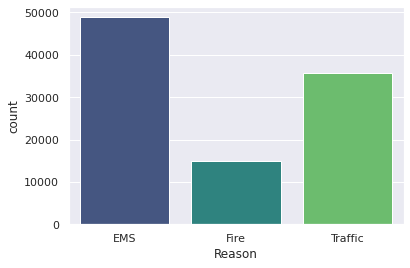

In [ ]:
sns.countplot('Reason', data=data, palette='viridis')

In [ ]:
data['timeStamp']=pd.to_datetime(data['timeStamp'])

data['Hr']=data['timeStamp'].apply(lambda time: time.hour)
data['Month']=data['timeStamp'].apply(lambda time: time.month)
data['day']=data['timeStamp'].apply(lambda time: time.dayofweek)

In [ ]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [ ]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hr,Month,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [ ]:
data['day'] = data['day'].map(dmap)

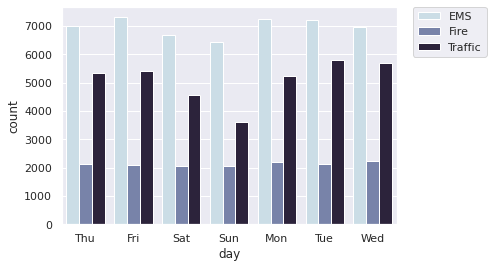

In [ ]:
sns.countplot(x='day',data=data,hue='Reason',palette='ch:s=.25,rot=-.25')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

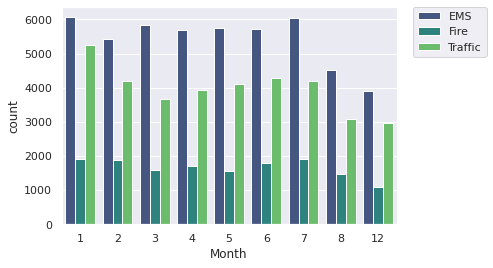

In [ ]:
sns.countplot(x='Month',data=data,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

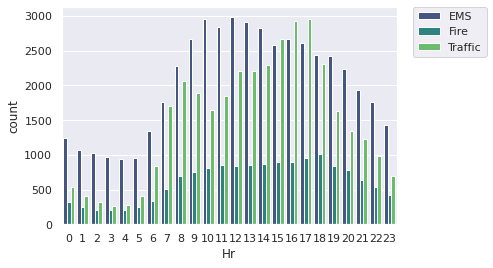

In [ ]:
sns.countplot(x='Hr',data=data,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
np.random.randint(5)

4